##### CAUTION: Completing and submitting the assignment constitutes your commitment to complete the assignment independently and not to plagiarize or provide others with the opportunity to plagiarize.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "郭子涵"
COLLABORATORS = "0921201"

---

### Problem 1: 课程安排 (50 points)
假设有如下课程表，你希望将尽可能多的课程安排在某间教室上（例如D3-110），但有些课的上课时间有冲突，如下图：

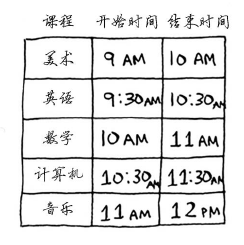

请设计一个算法，选出尽可能多且时间不冲突的课程。

In [3]:
from interval import Interval

class ClassTime:
    def __init__(self,name,interval):
        self.name = name
        self.interval=interval

def isOccupied(interval,y):#判断列表y中的已占用时间段是否和新的时间段interval冲突
    for item in y:
        if interval.overlaps(item):
            return True
    return False

def f(i,y):#类似于0-1背包，f(i,y）表示考虑第i-n门课程，已占用时段列表为y时所能安排不冲突课程的数量
    # YOUR CODE HERE
    if i==0:
        return 0
    else:
        if isOccupied(schedule[i-1].interval,y):
            return f(i-1,y)
        else:
            return max(f(i-1,y),f(i-1,y+[schedule[i-1].interval])+1)

def track():
    n=len(schedule)
    x=[0]*n
    y = []
    # YOUR CODE HERE
    for i in range(n,0,-1):
        if f(i,y)!=f(i-1,y):
            x[i-1]=1
            y.append(schedule[i-1].interval)
    return x

In [4]:
# 测试
schedule=[]
schedule.append(ClassTime("美术",Interval("09:00","10:00",closed=False)))
schedule.append(ClassTime("英语",Interval("09:30","10:30",closed=False)))
schedule.append(ClassTime("数学",Interval("10:00","11:00",closed=False)))
schedule.append(ClassTime("计算机",Interval("10:30","11:30",closed=False)))
schedule.append(ClassTime("音乐",Interval("11:00","12:00",closed=False)))
x=track()
course=[schedule[i].name for i in range(len(schedule)) if x[i]>0]


### Problem 2: 行程安排 (50 points)
假设你要去伦敦出差，其间的空闲可自由安排时间有两天，但你想去游览的地方很多，游览这些名胜所需的时间（已含交通）及你对它们的喜好如下图 ，请设计算法，确定你该去哪些景点。

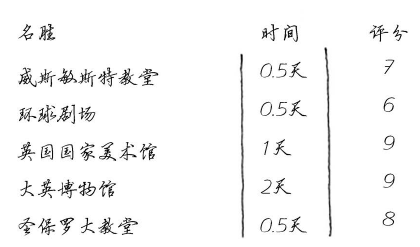

In [7]:
def spotSelect():
    f=[[0]*(M+1) for i in range(n)]
    # YOUR CODE HERE
    for i in range(n):
        for j in range(M + 1):
            if j >= w[i]:
                f[i][j] = max(f[i - 1][j], f[i - 1][j - w[i]] + p[i])
            else:
                f[i][j] = f[i - 1][j]
    return f

def track_loop(f):
    c=M
    x=[0]*n
    # YOUR CODE HERE
    for i in range(n - 1, -1, -1):
        if i > 0 and f[i][c] != f[i - 1][c]:
            x[i] = 1
            c -= w[i]
        else:
            x[i] = 0
    return x

In [9]:
# 测试
spotsList=["威斯敏斯特教堂","环球剧场","国家美术馆","大英博物馆","圣保罗大教堂"]
w=[0.5,0.5,1,2,0.5]
p=[7,6,9,9,8]
M=2
n=len(w)
w=[int(item*2) for item in w]
M=M*2
f=spotSelect()
x=track_loop(f)
tour=[spotsList[i] for i in range(len(x)) if x[i]==1]
